# Regressie model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
plt.rcParams["figure.figsize"] = (13,10)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#De aantal NaN waardes vinden in de dataframe
df.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [4]:
#Verwijderen van de kolommen met veel NaN waardes
df = df.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu','LotFrontage'], axis=1)

In [5]:
#Verwijderen van de NaN waardes uit de dataframe.
df.dropna()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Prestatiemetrics op train data

In [6]:
#Splitsen van de data
X = df.TotalBsmtSF
y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state = 1)

In [7]:
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)

In [8]:
#Fit regression model
dt = DecisionTreeRegressor(max_depth  = 2).fit(X_train, y_train)
dt2 = DecisionTreeRegressor(max_depth = 10).fit(X_train, y_train)

In [9]:
#Voorspellingen maken van de train data
predict1 = dt.predict(X_train)
predict2 = dt2.predict(X_train)

In [10]:
#Uitvoeren van de mean squared error
mean_squared_error(y_train, predict1, squared=False)

58748.390095180344

In [11]:
#R2 score berekenen
r2_score(y_train, predict1)

0.4334781885373482

In [12]:
mean_squared_error(y_train, predict2, squared=False)

42087.838084396724

In [13]:
r2_score(y_train, predict2)

0.7092378100105956

# Prestatiemetrics op test data

In [14]:
#Voorspellingen maken van de test data
pred = dt.predict(X_test)
pred2 = dt2.predict(X_test)

In [15]:
#Uitvoeren van de mean squared error
mean_squared_error(y_test, pred, squared=False)

63429.68268216442

In [16]:
mean_squared_error(y_test, pred2, squared=False)

74163.42050508167

In [17]:
#R2 score berekenen
r2_score(y_test, pred)

0.4358726040362271

In [18]:
r2_score(y_test, pred2)

0.2287918382642018

In [19]:
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 730  731  732  733  734  735  736  737  738  739  740  741  742  743
  744  745  746  747  748  749  750  751  752  753  754  755  756  757
  758  759  760  761  762  763  764  765  766  767  768  769  770  771
  772  773  774  775  776  777  778  779  780  781  782  783  784  785
  786  787  788  789  790  791  792  793  794  795  796  797  798  799
  800  801  802  803  804  805  806  807  808  809  810  811  812  813
  814  815  816  817  818  819  820  821  822  823  824  825  826  827
  828  829  830  831  832  833  834  835  836  837  838  839  840  841
  842  843  844  845  846  847  848  849  850  851  852  853  854  855
  856  857  858  859  860  861  862  863  864  865  866  867  868  869
  870  871  872  873  874  875  876  877  878  879  880  881  882  883
  884  885  886  887  888  889  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  919  920  921  922  923  924  925

# Bereken 2 prestatiemetrics op de traindata en op je de testdata. Zijn er groteverschillen? Zo ja, hoe zou dat kunnen komen?

Uiteraard zijn er grote verschillen tussen de getallen, omdat er gebruik gemaakt van aparte methodes. Wanneer er meer variabelen worden gebruikt, dan gaat de score steeds meer omhoog.

# Waarom heb je deze prestatiemetrics gekozen? Wat zijn de voor- en nadelen van deze prestatiemetrics?

**Voordelen:**

* Mean_squared_error is gebaseerd op uiterst redelijke probabilistische aannames.
* R2 is een intuïtieve meting van hoe goed de voorspellingen passen bij de waarnemingen.
* R2 hoeft niet vergeleken te worden met een ander model, de waarde vertelt je of het goed of slecht is

**Nadelen:**

* Mean_squared_error weegt grotere errors zwaarder dan kleinere.
* R2 kan niet bepalen of de coëfficiëntschattingen en voorspellingen vertekend zijn.
* Het toevoegen van een voorspeller zal ALTIJD de R2-score verhogen.

# Hyperparameters

**Welke hyperparameters in je model kun je instellen:**

* n_estimators
* max_features
* max_depth

**Wat zouden logische waarden kunnen zijn?**

* 10
* Auto
* 3

# Overfit en underfit model

Overfitted KNN scores:
 Train score= 0.6342465753424658
 Test score= 0.0027397260273972603
Underfitted KNN scores:
 Train score= 0.0410958904109589
 Test score= 0.0027397260273972603


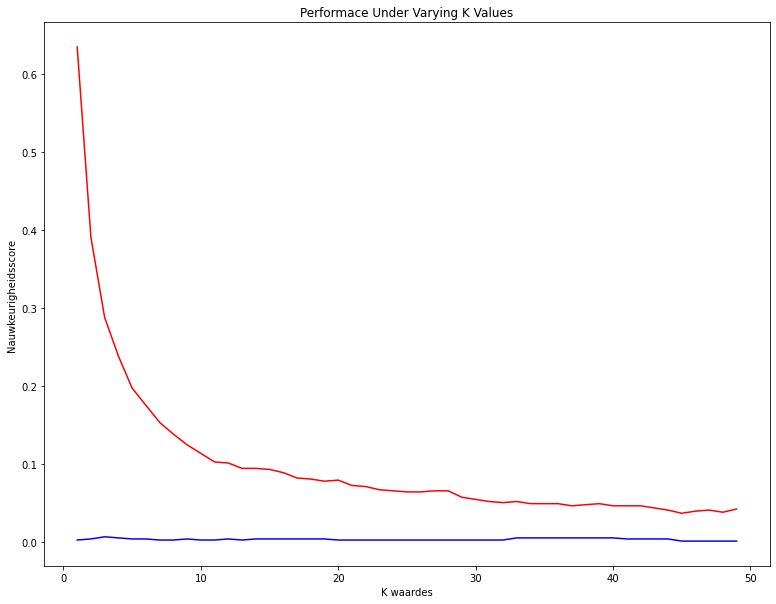

In [20]:
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
from sklearn.neighbors import KNeighborsClassifier

#Train- en testscoremeting K-neighbors classifier om underfitting en overfitting te vinden
k_values = range(1, 50, 1)
train_scores=[]
test_scores=[]
k_nn_models=[KNeighborsClassifier(n_neighbors=k) for k in k_values]
for k in k_values: 
    k_nn=k_nn_models[k-1]
    k_nn.fit(X_train,y_train)
    train_score=k_nn.score(X_train,y_train)
    test_score=k_nn.score(X_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

#Grafiek ter representatie
plt.plot(k_values,train_scores, color='red',label='Training Accuracy')
plt.plot(k_values,test_scores, color='blue',label='Testing Accuracy')
plt.xlabel('K waardes')
plt.ylabel('Nauwkeurigheidsscore')
plt.title('Performace Under Varying K Values')

#Initiatie en fitting van hiervoor genoemde modellen
overfitted_knn = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
underfitted_knn = KNeighborsClassifier(n_neighbors=50).fit(X_train,y_train)

#Meting en presentatie van hiervoor genoemde modellen
overfitted_train_score=overfitted_knn.score(X_train,y_train)
overfitted_test_score=overfitted_knn.score(X_test,y_test)

underfitted_train_score=underfitted_knn.score(X_train,y_train)
underfitted_test_score=underfitted_knn.score(X_test,y_test)
print("Overfitted KNN scores:\n Train score= " + str(overfitted_train_score) + "\n Test score= " + str(overfitted_test_score))
print("Underfitted KNN scores:\n Train score= " + str(underfitted_train_score) + "\n Test score= " + str(underfitted_test_score))

In [21]:
parameters = { 'n_neighbors' : range(1, 50, 2),
                'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, verbose = 1, cv=3, n_jobs = -1)
grid_results = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

Fitting 3 folds for each of 150 candidates, totalling 450 fits


C:\Users\Sener\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best: 0.010951 using {'metric': 'minkowski', 'n_neighbors': 43, 'weights': 'uniform'}


# GridSearchCV()

In [22]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [23]:
#Hier hebben we gebruik gemaakt van een reshape om de shape van de arrays te veranderen om de grid_search te kunnen doen
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)

In [24]:
#De grid search wordt hier uitgevoerd om de beste waardes voor de hyperparameters te bepalen
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {'n_estimators':np.arange(5,100,5),
                            'max_features':np.arange(0.1,1.0,0.05), 
                            'max_depth': [1, 2, 3, 4, 5],
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1710 candidates, totalling 8550 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=1)

In [25]:
print(" Results van Random Search " )
print("\n Beste schatter over de gezochte parameters:\n", grid_search.best_estimator_)
print("\n Beste score over alle gezochte parameters parameters:\n", grid_search.best_score_)
print("\n Beste parameters over alle gezochte parameters:\n", grid_search.best_params_)

 Results van Random Search 

 Beste schatter over de gezochte parameters:
 RandomForestRegressor(max_depth=3, max_features=0.1, n_estimators=70,
                      random_state=0)

 Beste score over alle gezochte parameters parameters:
 0.39362183869436185

 Beste parameters over alle gezochte parameters:
 {'max_depth': 3, 'max_features': 0.1, 'n_estimators': 70}


# Het model testen

#### Hier testen we het model met de beste parameters verkregen vanuit de grid seatch op de test dataset

In [26]:
def algoritme(x_data): 
    X_train, X_test, y_train, y_test = train_test_split(X2,y2 ,test_size=0.2, random_state = 1)
    rfreg = RandomForestRegressor(n_estimators = 40, max_features = 0.1, max_depth = 2).fit(X_train,y_train)
    scores = cross_val_score(rfreg, X_test, y_test, cv=5)
    return scores.mean()

# Classificatie model

## Week 1 lassificatie

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [28]:
df = pd.read_csv('data.csv')
#Dataset inladen om aan de slag te gaan met de data

In [29]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [32]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [33]:
#De bovenstaande stappen hebben we gedaan, om de data te verkennen. Eerst hebben we gekeken wat voor data het is en in wat voor format het staat. Daarna hebben we gekeken naar de nan/0 getallen. Die hebben we gedropt om de data te kunnen gebruiken in het classificatiemodel. 

In [34]:
#Dropping 32 columns that contain NaN values 
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [35]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [37]:
#In deze stap hebben we gekeken waar de verbanden lagen in de verschillende gegevens. Door deze stap hebben we bepaald welke gegevens onze x en y waardes worden in de volgende stap.

In [38]:
# Getting Features

x = df.drop(columns = 'diagnosis')

# Getting Predicting Value
y = df['diagnosis']

In [39]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
print(len(x_train))

455


In [41]:
print(len(x_test))

114


In [42]:
print(len(y_train))

455


In [43]:
print(len(y_test))

114


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Training Score:  100.0


In [46]:
print(accuracy_score(y_test,y_pred)*100)

96.49122807017544


In [47]:
print(confusion_matrix(y_test,y_pred))

[[65  2]
 [ 2 45]]


## Week 2 Classificatie

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [49]:
# Het train en test verschil met betrekking op de grootte van de dataset, bepaal je zelf. We hebben gekozen om de test set 20% vd gele dataset te laten zijn. 
# Dit betekent automatisch dat de train ste bestaat uit 80%.
# De prestatiemetrics wijzen uit dat er weldegelijk verschillen zijn met betrekking op de 2 verschillende sets. 

In [50]:
df2 = pd.read_csv('data.csv')

In [51]:
###  Independent And dependent features
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [52]:
X=X.dropna(axis=1)

In [53]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [54]:
#Na het verwijderen van de NaN waardes, hebben we geconcludeerd dat de gegevens van B/M correct zijn

In [55]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [56]:
cls1 = RandomForestClassifier()
cls1.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
#We hebben alle benodigde packages geimporteerd om de matrixen te kunnen maken

# Prestatiematrix

C:\Users\Sener\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


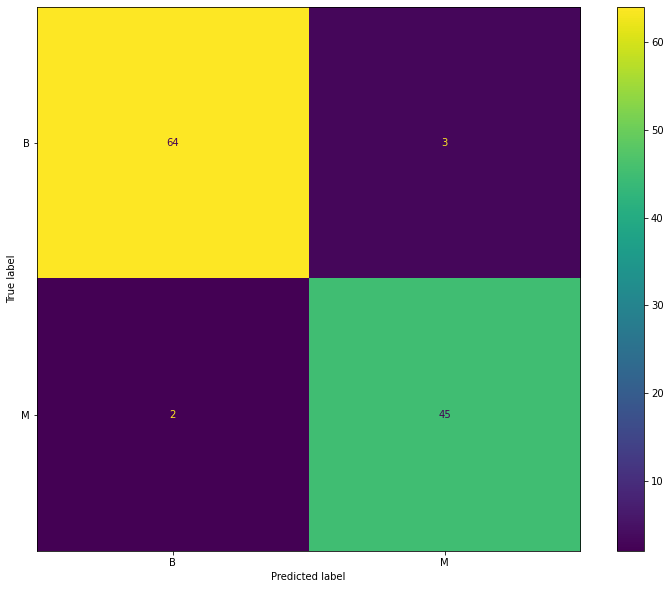

In [58]:
#Prestatiematrix
plot_confusion_matrix(cls1, x_test, y_test)

C:\Users\Sener\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


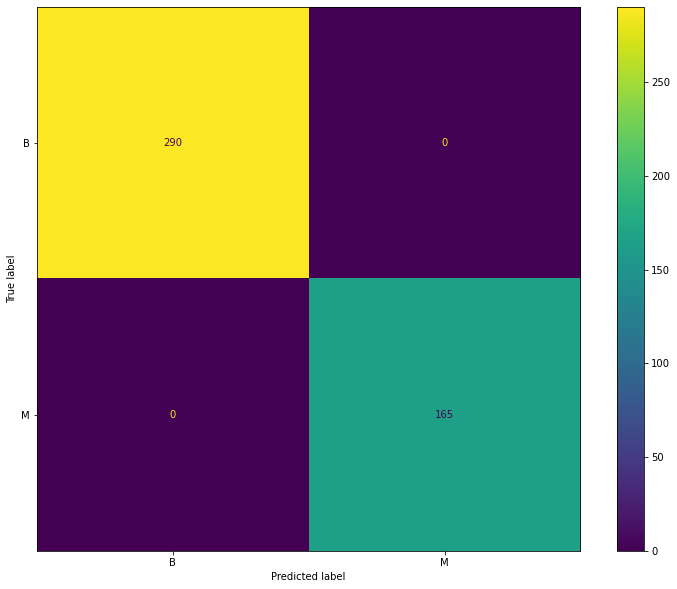

In [59]:
#Prestatiematrix
plot_confusion_matrix(cls1, x_train, y_train)

In [60]:
#Uit de verschillende prestatiemaxtrixen, is te zien dat er een duidelijk verschil is tussen de aantal waardes in de verschillende vakken
#Zichtbaar is, dat de testdata beschikt over meerdere fouten ten opzichte van de train data. Dat is te zien in het paarse vlak.
#Dit is opvallend, omdat de train data over meer gegevens beschikt, maar minder waardes in de paarse vlakken heeft.
#We hebben voor deze prestatiematrix gekozen (random forrest), omdat we al onderzocht hadden dat een random forrest classifier handig is voor een true or false classificatie. 
#Een RFC kan goed voorspellen of het schatten van kansen op gebeurtenissen, dat is precies wat we doen in deze opdracht.
#Een nadeel is dat het erg ingewikkeld kan zijn doordat er gebruik wordt gemaakt van 'meerdere bomen'.

In [61]:
print(confusion_matrix(y_test,y_pred))

[[65  2]
 [ 2 45]]


In [62]:
#K-FOLD analyse
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9035087719298246


In [63]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [64]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.94736842 0.9122807  0.87719298 0.94736842 0.89473684 0.96491228
 0.9122807  0.92982456 0.96491228 0.94642857]
0.9297305764411028


In [65]:
#Voor de K-fold analyse hebben we voor K de waarde 10 gegeven, omdat we deze waarde vaak terug zagen komen bij vergelijkbare vraagstukken
#Er is een duidelijk verschil te zien in de test en train data met dezelfde waarde voor K.
#Testwaarde = 90,6%, Trainwaarde = 93,7%

# Underfit en overfit model

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

#Hier laten we de zien hoe precies het model is
print('Accuracy KNN(1): ', knn.score(X_test, y_test))

Accuracy KNN(1):  0.8771929824561403


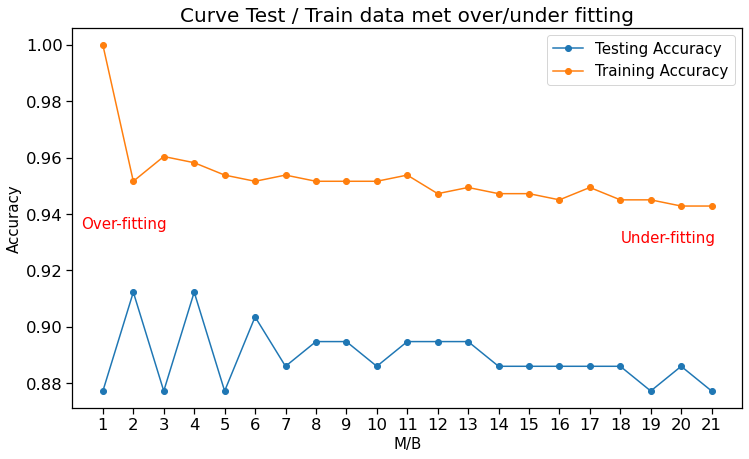

In [67]:

neighbors = np.arange(1, 22)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop verschillende waardes van K
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Curve Test / Train data met over/under fitting', size=20)
plt.plot(neighbors, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('M/B', size=15)
plt.ylabel('Accuracy', size=15)
plt.annotate('Over-fitting', xy=(0.5, 0.94), xytext=(0.3, 0.935), size=15, color='red')
plt.annotate('Under-fitting', xy=(0.5, 0.94), xytext=(18, 0.93), size=15, color='red')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0));

In [68]:
#In dit model is weergegeven dat er een significant verschil is tussen de test set en de train set
#Dit gaat over hoe precies de set is. 
#Het model is onderfit, omdat het model geen gegevens leert en het patroon niet extraheert.

# RandomizedSearchCV()

In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [70]:
rf_grid = {"n_estimators":np.arange(10, 1000, 20),
           "max_depth":[None, 3, 5, 10],
           "max_features":["sqrt", "log2", "auto"],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

In [71]:
random_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               n_jobs=-1,
                               random_state=0)
  
random_rf.fit(X_train, y_train)


print(f"Train score: {random_rf.score(X_train, y_train)}")
print(f"Test score: {random_rf.score(X_test, y_test)}")

Train score: 0.9868131868131869
Test score: 0.9385964912280702


In [72]:
#Er is gekozen voor deze parameters, omdat het verschil in test en train data nu goed wordt weergegeven. 
#Hier is de score per set af te lezen, er is een significant verschil in beide sets, met een percentageverschil van 9%

In [73]:
random_rf.best_params_

{'n_estimators': 70,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 5}

In [74]:
# Use parameters for the best model
best_rf = RandomForestClassifier()
best_rf.set_params(**random_rf.best_params_)

# Fit best model
best_rf.fit(x_train, y_train)

# Score best model
best_rf.score(x_test, y_test)

0.6403508771929824

In [75]:
#In de regels hierboven, worden de beste parameters voor het betreffende model in het model gestopt, om zo een reele schatting te maken. 
